# SMOTE- Synthetic Minority Oversampling Technique


## Overview

SMOTE (Synthetic Minority Oversampling Technique) is a widely used data augmentation technique in machine learning for addressing imbalanced datasets. This README provides a brief explanation of SMOTE, its purpose, and how to use it effectiv
#references)

## Introduction

Imbalanced datasets are a common challenge in machine learning, where one class of data significantly outnumbers another class. This can lead to biased models that perform poorly on the minority class. SMOTE is designed to mitigate this issue by generating synthetic samples for the minority class, thereby balancing the dataset.

## How SMOTE Works

1. **Selecting a Minority Instance**: SMOTE randomly chooses a data point from the minority class.

2. **Selecting Nearest Neighbors**: It identifies the k nearest neighbors to the selected instance from the minority class. The value of k is a user-defined parameter.

3. **Generating Synthetic Samples**: SMOTE generates synthetic instances by interpolating between the selected instance and its k nearest neighbors. This is done by selecting a random number between 0 and 1 as a weighting factor to create new instances along the line connecting the selected instance and its neighbors. This process is repeated for the desired number of synthetic samples.

4. **Adding Synthetic Samples**: The newly generated synthetic samples are added to the minority class, effectively balancing the class distribution.

## Key Considerations

- Carefully choose the parameter k (number of nearest neighbors) based on your dataset characteristics.

- Apply SMOTE only to the training dataset to prevent data leakage into the validation or test sets.

- Explore variations of SMOTE like Borderline-SMOTE and ADASYN, which address specific aspects of imbalanced data.

- SMOTE may introduce some noise into the dataset, so evaluate its impact on model performance.

## Usage

To use SMOTE effectively for handling imbalanced datasets, follow these steps:

1. Import the necessary libraries (e.g., scikit-learn for Python users).

2. Load your imbalanced dataset.

3. Apply SMOTE to the training dataset using your chosen parameters.

4. Train your machine learning model on the balanced dataset.

5. Evaluate model performance on validation and test sets.

## References

- [Original SMOTE Paper](https://www.jair.org/papers/paper953.html)
- [Python library scikit-learn - SMOTE documentation](https://imbalanced-learn.org/stable/over_sampling.html#smote-variants)
- [Borderline-SMOTE](https://imbalanced-learn.org/stable/over_sampling.html#borderline-smote-variants)
- [ADASYN](https://imbalanced-learn.org/stable/over_sampling.html#adasyn)


In [36]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [37]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [38]:
import pandas as pd

In [40]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [41]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [42]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

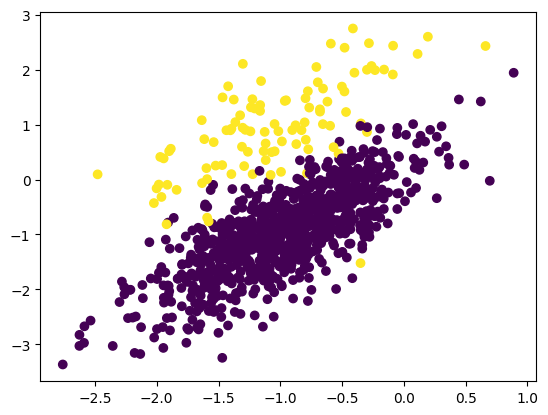

In [44]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [45]:
## Trasnform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [46]:
X.shape

(1800, 2)

In [47]:
y.shape

(1800,)

In [48]:
len(y[y==0])

900

In [49]:
len(y[y==1])


900

In [50]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [51]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


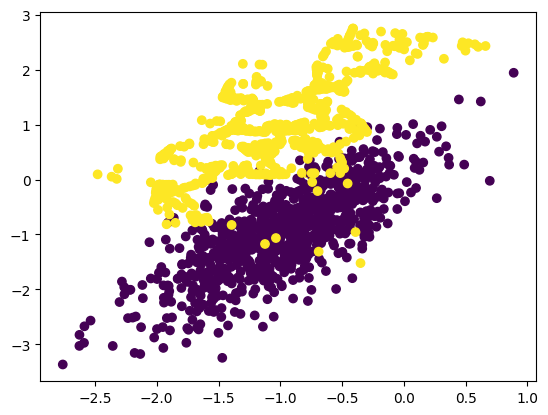

In [52]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])